In [2127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())

chargingprofile1 = pd.read_csv('./data/yearly_charging_profile_1.csv', header=None)
chargingprofile1 = chargingprofile1.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile1.index = range(1, len(chargingprofile1) + 1)
chargingprofile1 = min_max_normalize(chargingprofile1)

consumer1 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad861.csv', header=None)
consumer1 = consumer1*4
consumer1.columns = range(1, consumer1.shape[1] + 1)
consumer1.index = range(1, len(consumer1) + 1)

consumer2 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad464.csv', header=None)
consumer2 = consumer2*4
consumer2.columns = range(1, consumer2.shape[1] + 1)
consumer2.index = range(1, len(consumer2) + 1)

consumer3 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad540.csv', header=None)
consumer3 = consumer3*4
consumer3.columns = range(1, consumer3.shape[1] + 1)
consumer3.index = range(1, len(consumer3) + 1)

solargen = pd.read_excel('./data/Belgium_solar_generation_probability_density.xlsx', sheet_name='Solar_profiles',header=None)
solargen = solargen
solargen = solargen.drop(index=0, columns=0).reset_index(drop=True)
solargen.index = range(1, len(solargen) + 1)
solargen = solargen.iloc[:, :-1]

# print((consumer3-solargen).mean(axis=0).min())
# print((consumer1).mean(axis=0).min())
# print((consumer1+chargingprofile1).var(axis=0).min())
# print((consumer2+chargingprofile1).var(axis=0).min())
# print((consumer3+chargingprofile1).var(axis=0).min())
# print((consumer1-solargen).var(axis=0).min())
# print((consumer2-solargen).var(axis=0).min())
# print((consumer3-solargen).var(axis=0).min())
# print((consumer1).var(axis=0).min())
# print((consumer2).var(axis=0).min())
# print((consumer3).var(axis=0).min())

Per day: 96x365 => 1x365

Statistical moments

-1.0171117624875656
0.7767299382716049
Second difference
Second difference
Second difference


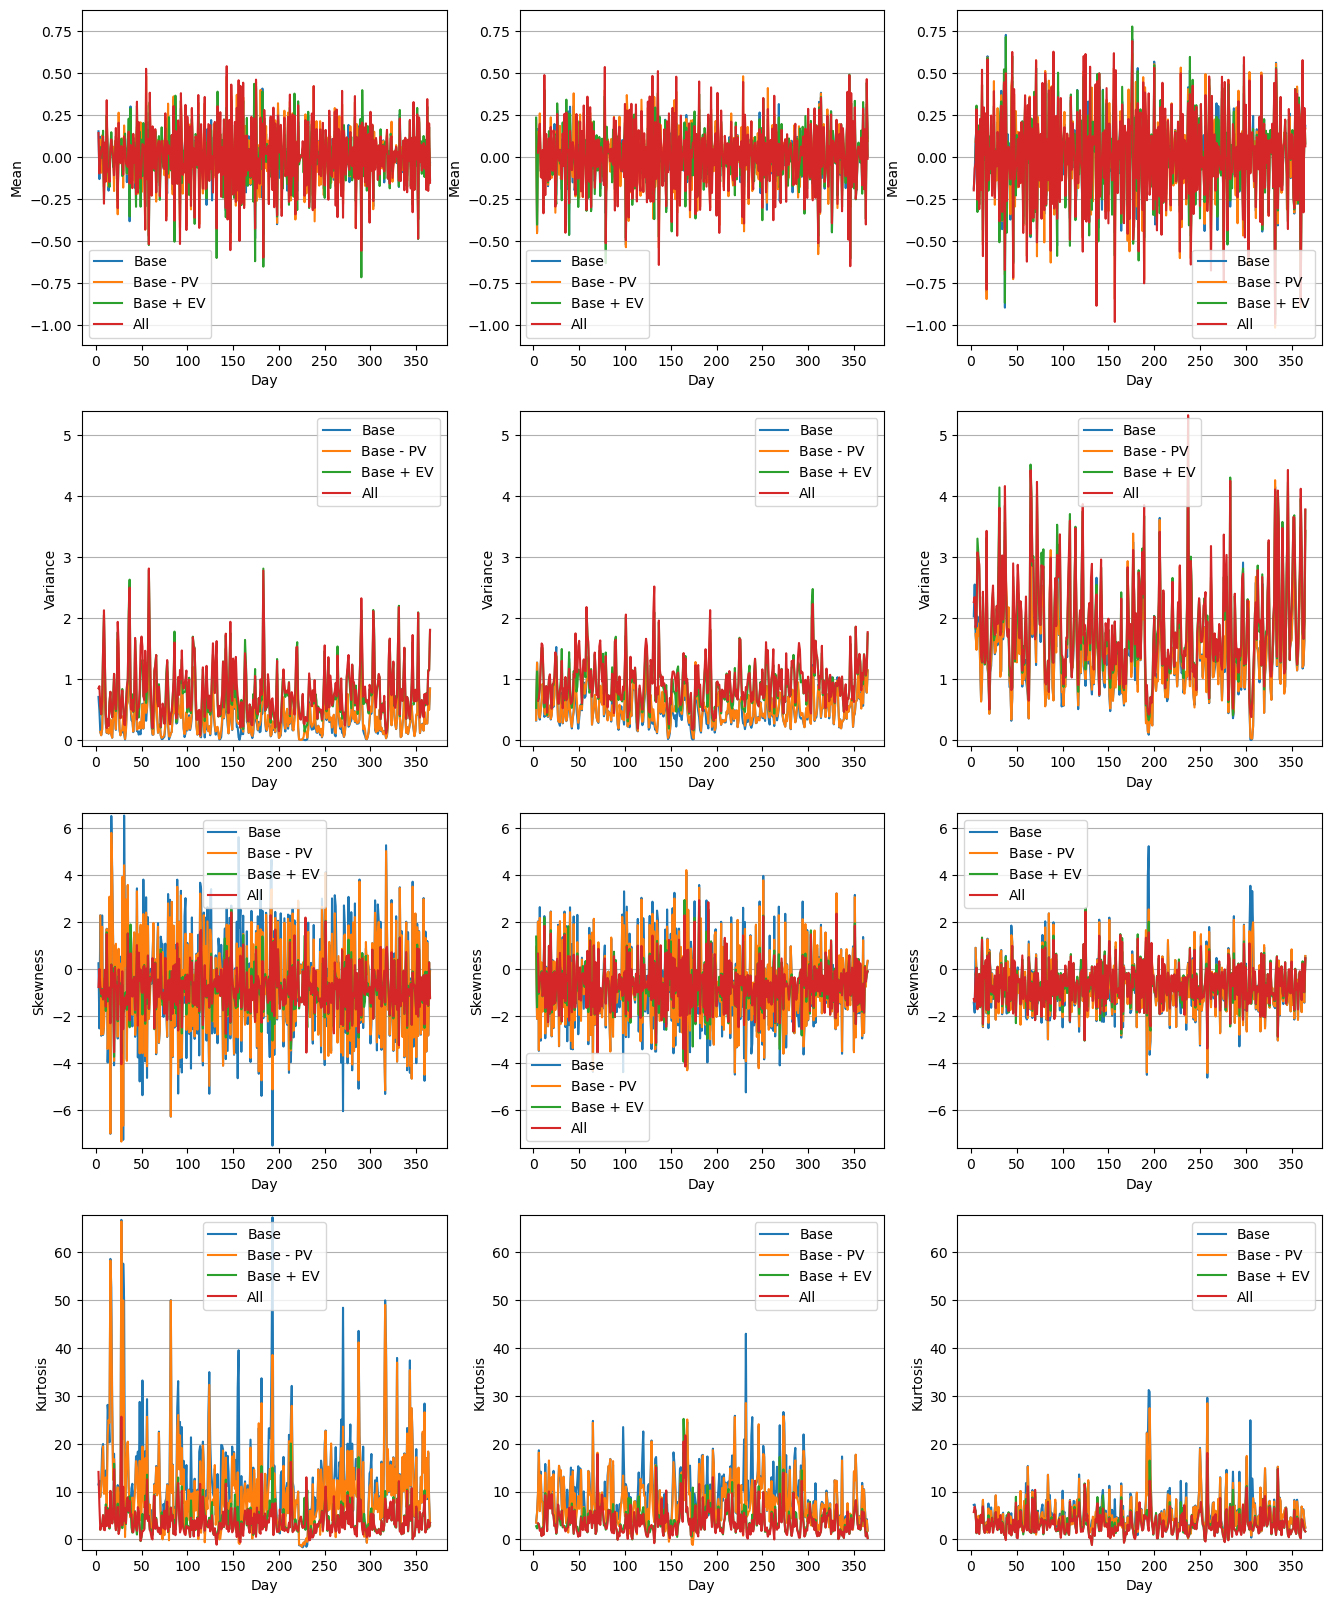

In [2128]:
# del min
# del max
# del mean
time_series = 0
first_difference = 0
second_difference = 1
chargingprofile = chargingprofile1

# consumer_profiles = [consumer1, consumer2, consumer3, consumer4]
consumer_profiles = [consumer1, consumer2, consumer3]

fig, axs = plt.subplots(4, 3, figsize=(16, 20))

all_means, all_vars, all_skews, all_kurts = [], [], [], []
for consumer_profile in consumer_profiles:
    if first_difference == 1:
        net_consumption_ev = (consumer_profile + chargingprofile).diff().iloc[1:]
        net_consumption_pv = (consumer_profile - solargen).diff().iloc[1:]
        consumer_profile = consumer_profile.diff().iloc[1:]
        # net_consumption_ev = (consumer_profile + chargingprofile).diff(axis=1).drop(net_consumption_ev.columns[0], axis=1)
        # net_consumption_pv = (consumer_profile - solargen).diff(axis=1).drop(net_consumption_pv.columns[0], axis=1)
        # consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)
    if second_difference == 1:
    #     net_consumption_ev = (consumer_profile + chargingprofile).diff().iloc[1:].diff().iloc[1:]
    #     net_consumption_pv = (consumer_profile - solargen).diff().iloc[1:].diff().iloc[1:]
    #     consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        net_consumption_ev = (consumer_profile + chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption_ev.columns[0:2], axis=1)
        net_consumption_pv = (consumer_profile - solargen).diff(axis=1).diff(axis=1).drop(net_consumption_pv.columns[0:2], axis=1)
        consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)
        
    elif time_series == 1:
        net_consumption_ev = consumer_profile + chargingprofile
        net_consumption_pv = consumer_profile - solargen

    # Store values for global min/max computation
    all_means.extend([consumer_profile.mean(axis=0), net_consumption_pv.mean(axis=0), net_consumption_ev.mean(axis=0)])
    all_vars.extend([consumer_profile.var(axis=0), net_consumption_pv.var(axis=0), net_consumption_ev.var(axis=0)])
    all_skews.extend([consumer_profile.skew(axis=0), net_consumption_pv.skew(axis=0), net_consumption_ev.skew(axis=0)])
    all_kurts.extend([consumer_profile.kurt(axis=0), net_consumption_pv.kurt(axis=0), net_consumption_ev.kurt(axis=0)])

# Calculate global min and max for each statistic
print(min(map(lambda x: x.min(), all_means)))
print(max(map(lambda x: x.max(), all_means)))
mean_min, mean_max = min(map(lambda x: x.min(), all_means)), max(map(lambda x: x.max(), all_means))
var_min, var_max = min(map(lambda x: x.min(), all_vars)), max(map(lambda x: x.max(), all_vars))
skew_min, skew_max = min(map(lambda x: x.min(), all_skews)), max(map(lambda x: x.max(), all_skews))
kurt_min, kurt_max = min(map(lambda x: x.min(), all_kurts)), max(map(lambda x: x.max(), all_kurts))


for i, consumer_profile in enumerate(consumer_profiles):
    # First difference
    if first_difference == 1:
        print("First difference")
        net_consumption_ev = (consumer_profile + chargingprofile).diff().iloc[1:]
        net_consumption_pv = (consumer_profile - solargen).diff().iloc[1:]
        net_consumption_all = (consumer_profile + chargingprofile - solargen).diff().iloc[1:]
        consumer_profile = consumer_profile.diff().iloc[1:]

        # net_consumption_ev = (consumer_profile + chargingprofile).diff(axis=1).drop(net_consumption_ev.columns[0], axis=1)
        # net_consumption_pv = (consumer_profile - solargen).diff(axis=1).drop(net_consumption_pv.columns[0], axis=1)
        # net_consumption_all = (consumer_profile + chargingprofile - solargen).diff(axis=1).drop(net_consumption_all.columns[0], axis=1)
        # consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)

    if second_difference == 1:
        print('Second difference')
        # net_consumption_ev = (consumer_profile + chargingprofile).diff().iloc[1:].diff().iloc[1:]
        # net_consumption_pv = (consumer_profile - solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption_all = (consumer_profile + chargingprofile - solargen).diff().iloc[1:].diff().iloc[1:]
        # consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]

        net_consumption_ev = (consumer_profile + chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption_ev.columns[0:2], axis=1)
        net_consumption_pv = (consumer_profile - solargen).diff(axis=1).diff(axis=1).drop(net_consumption_pv.columns[0:2], axis=1)
        net_consumption_all = (consumer_profile + chargingprofile - solargen).diff(axis=1).diff(axis=1).drop(net_consumption_all.columns[0:2], axis=1)
        consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)
        
    elif time_series == 1:
        print('Time series')
        net_consumption_ev = consumer_profile + chargingprofile
        net_consumption_pv = consumer_profile - solargen
        net_consumption_all = consumer_profile + chargingprofile - solargen
    
    axs[0,i].plot(consumer_profile.mean(axis=0), label = 'Base')
    axs[0,i].plot(net_consumption_pv.mean(axis=0), label = 'Base - PV')
    axs[0,i].plot(net_consumption_ev.mean(axis=0), label = 'Base + EV')
    axs[0,i].plot(net_consumption_all.mean(axis=0), label = 'All')
    axs[0, i].set_ylim(mean_min-0.1, mean_max+0.1)
    axs[0,i].set_xlabel('Day')
    axs[0,i].set_ylabel('Mean')
    axs[0,i].legend()
    axs[0,i].grid(axis='y')

    axs[1,i].plot(consumer_profile.var(axis=0), label = 'Base')
    axs[1,i].plot(net_consumption_pv.var(axis=0), label = 'Base - PV')
    axs[1,i].plot(net_consumption_ev.var(axis=0), label = 'Base + EV')
    axs[1,i].plot(net_consumption_all.var(axis=0), label = 'All')
    axs[1, i].set_ylim(var_min-0.1, var_max+0.1)
    axs[1,i].set_xlabel('Day')
    axs[1,i].set_ylabel('Variance')
    axs[1,i].legend()
    axs[1,i].grid(axis='y')

    axs[2,i].plot(consumer_profile.skew(axis=0), label = 'Base')
    axs[2,i].plot(net_consumption_pv.skew(axis=0), label = 'Base - PV')
    axs[2,i].plot(net_consumption_ev.skew(axis=0), label = 'Base + EV')
    axs[2,i].plot(net_consumption_all.skew(axis=0), label = 'All')
    axs[2, i].set_ylim(skew_min-0.1, skew_max+0.1)
    axs[2,i].set_xlabel('Day')
    axs[2,i].set_ylabel('Skewness')
    axs[2,i].legend()
    axs[2,i].grid(axis='y')

    axs[3,i].plot(consumer_profile.kurt(axis=0), label = 'Base')
    axs[3,i].plot(net_consumption_pv.kurt(axis=0), label = 'Base - PV')
    axs[3,i].plot(net_consumption_ev.kurt(axis=0), label = 'Base + EV')
    axs[3,i].plot(net_consumption_all.kurt(axis=0), label = 'All')
    axs[3, i].set_ylim(kurt_min-0.5, kurt_max+0.5)
    axs[3,i].set_xlabel('Day')
    axs[3,i].set_ylabel('Kurtosis')
    axs[3,i].legend()
    axs[3,i].grid(axis='y')


In [2129]:
min=0
max=1
mean=0
print('MEAN')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:]
        #consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)
    if second_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        #consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)

    if min==1:
        print((consumer_profile).mean(axis=0).min())
    if max ==1:
        print((consumer_profile).mean(axis=0).max())
    if mean ==1:
        print((consumer_profile).mean(axis=0).mean())
print('\n')
print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption = (consumer_profile-solargen).diff().iloc[1:]
        #net_consumption = (consumer_profile-solargen).diff(axis=1).drop(net_consumption.columns[0], axis=1)

    if second_difference == 1:
        net_consumption = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        #net_consumption = (consumer_profile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption.columns[0:2], axis=1)
    if time_series ==1:
        net_consumption = consumer_profile - solargen

    if min==1:
        print(net_consumption.mean(axis=0).min())
    if max ==1:
        print((net_consumption).mean(axis=0).max())
    if mean ==1:
        print((net_consumption).mean(axis=0).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption = (consumer_profile+chargingprofile).diff().iloc[1:]
        #net_consumption = (consumer_profile+chargingprofile).diff(axis=1).drop(net_consumption.columns[0], axis=1)

    if second_difference == 1:
        net_consumption = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        #net_consumption = (consumer_profile+chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption.columns[0:2], axis=1)
    if time_series ==1:
        net_consumption = consumer_profile+chargingprofile


    if min==1:
        print((net_consumption).mean(axis=0).min())
    if max ==1:
        print((net_consumption).mean(axis=0).max())
    if mean ==1:
        print((net_consumption).mean(axis=0).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).drop(net_consumption2.columns[0], axis=1)
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).drop(net_consumption3.columns[0], axis=1)
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).drop(net_consumption4.columns[0], axis=1)


    if second_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption3.columns[0:2], axis=1)
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption4.columns[0:2], axis=1)

    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10)  
    
    if min==1:
        print((net_consumption1).mean(axis=0).min())
        print((net_consumption2).mean(axis=0).min())
        print((net_consumption3).mean(axis=0).min())
        print((net_consumption4).mean(axis=0).min())
    if max ==1:
        print((net_consumption1).mean(axis=0).max())
        print((net_consumption2).mean(axis=0).max())
        print((net_consumption3).mean(axis=0).max())
        print((net_consumption4).mean(axis=0).max())
    if mean ==1:
        print((net_consumption1).mean(axis=0).mean())
        print((net_consumption2).mean(axis=0).mean())
        print((net_consumption3).mean(axis=0).mean())
        print((net_consumption4).mean(axis=0).mean())

del min
del max
del mean


MEAN
Base
0.01995744680851064
0.0029787234042553275
0.020723404255319135


Base-pv
0.01995744680851064
0.002978723404255322
0.020723404255319152


Base+ev
0.01995744680851064
0.0029787234042553206
0.020723404255319135


All
0.01995744680851064
0.01995744680851064
0.019957446808510634
0.019957446808510627
0.002978723404255322
0.0029787234042553206
0.0029787234042553358
0.0029787234042553206
0.020723404255319145
0.020723404255319135
0.020723404255319162
0.020723404255319124


In [2130]:
min=0
max=1
mean=0
print('variance')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:]
        #consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)

    if second_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        #consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)

    if min==1:
        print((consumer_profile).var(axis=0).min())
    if max ==1:
        print((consumer_profile).var(axis=0).max())
    if mean ==1:
        print((consumer_profile).var(axis=0).mean())
print('\n')
print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:]
        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:]
        # net_consumption1 = (consumer_profile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:].diff().iloc[1:]

        # net_consumption1 = (consumer_profile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    
    if time_series == 1:
        net_consumption1 = (consumer_profile-solargen)
        net_consumption2 = (consumer_profile-solargen*10)

    if min==1:
        print(net_consumption1.var(axis=0).min())
        print(net_consumption2.var(axis=0).min())

    if max ==1:
        print(net_consumption1.var(axis=0).max())
        print(net_consumption2.var(axis=0).max())
    if mean ==1:
        print(net_consumption1.var(axis=0).mean())
        print(net_consumption2.var(axis=0).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:]

        # net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:].diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile)
        net_consumption2 = (consumer_profile+chargingprofile*23)
    if min==1:
        print((net_consumption1).var(axis=0).min())
        print((net_consumption2).var(axis=0).min())
    if max ==1:
        print((net_consumption1).var(axis=0).max())
        print((net_consumption2).var(axis=0).max())
    if mean ==1:
        print((net_consumption1).var(axis=0).mean())
        print((net_consumption2).var(axis=0).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).drop(net_consumption2.columns[0], axis=1)
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).drop(net_consumption3.columns[0], axis=1)
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).drop(net_consumption4.columns[0], axis=1)


    if second_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption3.columns[0:2], axis=1)
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption4.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10)  
    if min==1:
        print((net_consumption1).var(axis=0).min())
        print((net_consumption2).var(axis=0).min())
        print((net_consumption3).var(axis=0).min())
        print((net_consumption4).var(axis=0).min())
    if max ==1:
        print((net_consumption1).var(axis=0).max())
        print((net_consumption2).var(axis=0).max())
        print((net_consumption3).var(axis=0).max())
        print((net_consumption4).var(axis=0).max())
    if mean ==1:
        print((net_consumption1).var(axis=0).mean())
        print((net_consumption2).var(axis=0).mean())
        print((net_consumption3).var(axis=0).mean())
        print((net_consumption4).var(axis=0).mean())

del min
del max
del mean


variance
Base
1.354856294669412
1.1221904754060854
2.463319348432854


Base-pv
1.3533188632597428
1.3419486330212003
1.1212208956930219
1.1725399015957771
2.4637947230849617
2.4683852989783497


Base+ev
1.449097222088767
34.32924732692749
1.1732009552208265
33.60493889590483
2.5409967677876923
33.77664871398188


All
1.4475408689556253
1.4360003432058337
34.32906677883591
34.32763175417674
1.168788188469046
1.1891185110233524
33.60479064662851
33.603646311306626
2.5414964982436072
2.546306276371256
33.77588772475138
33.785378429242094


In [2131]:
min=0
max=1
mean=0
print('skewness')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:]
        #consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)

    if second_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        #consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)

    if min==1:
        print((consumer_profile).skew(axis=0).min())
    if max ==1:
        print((consumer_profile).skew(axis=0).max())
    if mean ==1:
        print((consumer_profile).skew(axis=0).mean())
print('\n')
print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:]
        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:]        
        # net_consumption1 = (consumer_profile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        # net_consumption1 = (consumer_profile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile-solargen)
        net_consumption2 = (consumer_profile-solargen*10)

    if min==1:
        print(net_consumption1.skew(axis=0).min())
        print(net_consumption2.skew(axis=0).min())

    if max ==1:
        print(net_consumption1.skew(axis=0).max())
        print(net_consumption2.skew(axis=0).max())
    if mean ==1:
        print(net_consumption1.skew(axis=0).mean())
        print(net_consumption2.skew(axis=0).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:]

        # net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:].diff().iloc[1:]        
        # net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile)
        net_consumption2 = (consumer_profile+chargingprofile*23)
    if min==1:
        print((net_consumption1).skew(axis=0).min())
        print((net_consumption2).skew(axis=0).min())
    if max ==1:
        print((net_consumption1).skew(axis=0).max())
        print((net_consumption2).skew(axis=0).max())
    if mean ==1:
        print((net_consumption1).skew(axis=0).mean())
        print((net_consumption2).skew(axis=0).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).drop(net_consumption2.columns[0], axis=1)
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).drop(net_consumption3.columns[0], axis=1)
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).drop(net_consumption4.columns[0], axis=1)


    if second_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption3.columns[0:2], axis=1)
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption4.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10)  
    if min==1:
        print((net_consumption1).skew(axis=0).min())
        print((net_consumption2).skew(axis=0).min())
        print((net_consumption3).skew(axis=0).min())
        print((net_consumption4).skew(axis=0).min())
    if max ==1:
        print((net_consumption1).skew(axis=0).max())
        print((net_consumption2).skew(axis=0).max())
        print((net_consumption3).skew(axis=0).max())
        print((net_consumption4).skew(axis=0).max())
    if mean ==1:
        print((net_consumption1).skew(axis=0).mean())
        print((net_consumption2).skew(axis=0).mean())
        print((net_consumption3).skew(axis=0).mean())
        print((net_consumption4).skew(axis=0).mean())

del min
del max
del mean


skewness
Base
3.671607287516177
1.1633221567569128
1.5193725761264165


Base-pv
3.4453549841199633
1.6602431435131806
1.1880872518092915
1.3769795990907747
1.5267818668304516
1.580514193453493


Base+ev
1.799444330627849
0.2591275828117954
1.9529159430728777
0.364245976524061
1.0887247308466643
0.4615241130496915


All
1.7216888450741348
1.570781002374995
0.26137709756121885
0.33135170249817136
1.9394874801183146
1.7858789858719244
0.36193812479197446
0.4037414259923398
1.0981829491964752
1.1740451221454515
0.4605395070312987
0.6318550345907721


In [2132]:
min=0
max=1
mean=0
print('kurtosis')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:]
        #consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)

    if second_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        #consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)

    if min==1:
        print((consumer_profile).kurt(axis=0).min())
    if max ==1:
        print((consumer_profile).kurt(axis=0).max())
    if mean ==1:
        print((consumer_profile).kurt(axis=0).mean())
print('\n')
print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:]
        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:]
        # net_consumption1 = (consumer_profile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        # net_consumption1 = (consumer_profile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile-solargen)
        net_consumption2 = (consumer_profile-solargen*10)
    if min==1:
        print(net_consumption1.kurt(axis=0).min())
        print(net_consumption2.kurt(axis=0).min())

    if max ==1:
        print(net_consumption1.kurt(axis=0).max())
        print(net_consumption2.kurt(axis=0).max())
    if mean ==1:
        print(net_consumption1.kurt(axis=0).mean())
        print(net_consumption2.kurt(axis=0).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:].diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile)
        net_consumption2 = (consumer_profile+chargingprofile*23)
    if min==1:
        print((net_consumption1).kurt(axis=0).min())
        print((net_consumption2).kurt(axis=0).min())
    if max ==1:
        print((net_consumption1).kurt(axis=0).max())
        print((net_consumption2).kurt(axis=0).max())
    if mean ==1:
        print((net_consumption1).kurt(axis=0).mean())
        print((net_consumption2).kurt(axis=0).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).drop(net_consumption2.columns[0], axis=1)
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).drop(net_consumption3.columns[0], axis=1)
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).drop(net_consumption4.columns[0], axis=1)


    if second_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption3.columns[0:2], axis=1)
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption4.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10)  
    if min==1:
        print((net_consumption1).kurt(axis=0).min())
        print((net_consumption2).kurt(axis=0).min())
        print((net_consumption3).kurt(axis=0).min())
        print((net_consumption4).kurt(axis=0).min())
    if max ==1:
        print((net_consumption1).kurt(axis=0).max())
        print((net_consumption2).kurt(axis=0).max())
        print((net_consumption3).kurt(axis=0).max())
        print((net_consumption4).kurt(axis=0).max())
    if mean ==1:
        print((net_consumption1).kurt(axis=0).mean())
        print((net_consumption2).kurt(axis=0).mean())
        print((net_consumption3).kurt(axis=0).mean())
        print((net_consumption4).kurt(axis=0).mean())

del min
del max
del mean


kurtosis
Base
57.41661968699769
42.09544735092435
51.088934186082014


Base-pv
57.34775265855738
54.56820236110886
41.94383538609036
40.344880639006014
50.90922692870843
38.78632722597694


Base+ev
41.32417358456049
46.33771440054939
33.95438999289241
46.149388339413434
37.94073042738969
44.182439060691856


All
41.21621542207406
39.16610369164533
46.33830118362504
46.320841498520544
33.88817444535467
33.12507608760473
46.146720315770295
46.09740970628075
37.50961917440778
36.58733123910388
44.18257374359138
44.06513225724866


Per quarter hour

In [2133]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())

chargingprofile1 = pd.read_csv('./data/yearly_charging_profile_1.csv', header=None)
chargingprofile1 = chargingprofile1.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile1.index = range(1, len(chargingprofile1) + 1)
chargingprofile1 = min_max_normalize(chargingprofile1)

consumer1 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad861.csv', header=None)
consumer1 = consumer1*4
consumer1.columns = range(1, consumer1.shape[1] + 1)
consumer1.index = range(1, len(consumer1) + 1)

consumer2 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad464.csv', header=None)
consumer2 = consumer2*4
consumer2.columns = range(1, consumer2.shape[1] + 1)
consumer2.index = range(1, len(consumer2) + 1)

consumer3 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad540.csv', header=None)
consumer3 = consumer3*4
consumer3.columns = range(1, consumer3.shape[1] + 1)
consumer3.index = range(1, len(consumer3) + 1)

solargen = pd.read_excel('./data/Belgium_solar_generation_probability_density.xlsx', sheet_name='Solar_profiles',header=None)
solargen = solargen
solargen = solargen.drop(index=0, columns=0).reset_index(drop=True)
solargen.index = range(1, len(solargen) + 1)
solargen = solargen.iloc[:, :-1]

-0.24712026959932787
0.29349155673938776
Second difference
Second difference
Second difference


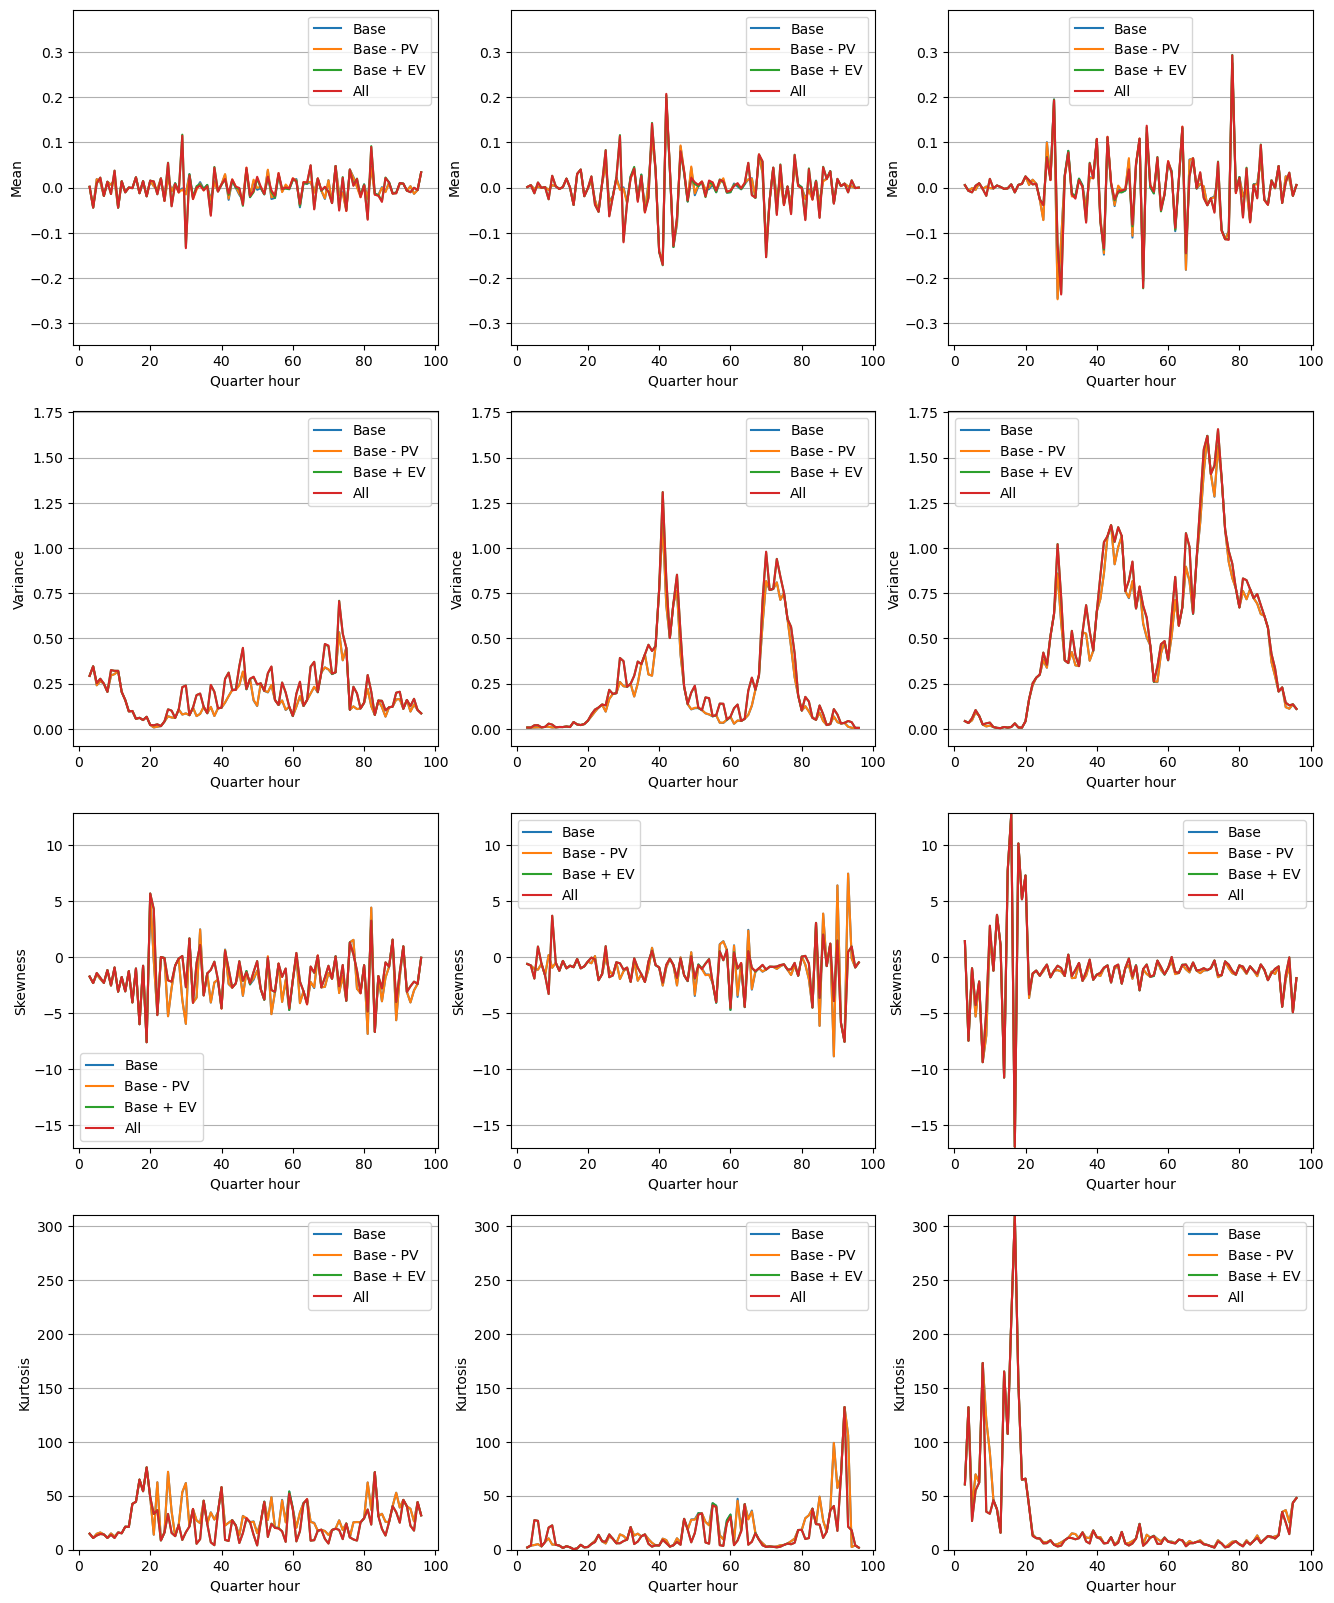

In [2134]:
# del min
# del max
# del mean
time_series = 0
first_difference = 0
second_difference = 1
chargingprofile = chargingprofile1

# consumer_profiles = [consumer1, consumer2, consumer3, consumer4]
consumer_profiles = [consumer1, consumer2, consumer3]

fig, axs = plt.subplots(4, 3, figsize=(16, 20))

all_means, all_vars, all_skews, all_kurts = [], [], [], []
for consumer_profile in consumer_profiles:
    if first_difference == 1:
        net_consumption_ev = (consumer_profile + chargingprofile).diff().iloc[1:]
        net_consumption_pv = (consumer_profile - solargen).diff().iloc[1:]
        consumer_profile = consumer_profile.diff().iloc[1:]
        # net_consumption_ev = (consumer_profile + chargingprofile).diff(axis=1).drop(net_consumption_ev.columns[0], axis=1)
        # net_consumption_pv = (consumer_profile - solargen).diff(axis=1).drop(net_consumption_pv.columns[0], axis=1)
        # consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)
    if second_difference == 1:
        net_consumption_ev = (consumer_profile + chargingprofile).diff().iloc[1:].diff().iloc[1:]
        net_consumption_pv = (consumer_profile - solargen).diff().iloc[1:].diff().iloc[1:]
        consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        # net_consumption_ev = (consumer_profile + chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption_ev.columns[0:2], axis=1)
        # net_consumption_pv = (consumer_profile - solargen).diff(axis=1).diff(axis=1).drop(net_consumption_pv.columns[0:2], axis=1)
        # consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)
        
    elif time_series == 1:
        net_consumption_ev = consumer_profile + chargingprofile
        net_consumption_pv = consumer_profile - solargen

    # Store values for global min/max computation
    all_means.extend([consumer_profile.mean(axis=1), net_consumption_pv.mean(axis=1), net_consumption_ev.mean(axis=1)])
    all_vars.extend([consumer_profile.var(axis=1), net_consumption_pv.var(axis=1), net_consumption_ev.var(axis=1)])
    all_skews.extend([consumer_profile.skew(axis=1), net_consumption_pv.skew(axis=1), net_consumption_ev.skew(axis=1)])
    all_kurts.extend([consumer_profile.kurt(axis=1), net_consumption_pv.kurt(axis=1), net_consumption_ev.kurt(axis=1)])

# Calculate global min and max for each statistic
print(min(map(lambda x: x.min(), all_means)))
print(max(map(lambda x: x.max(), all_means)))
mean_min, mean_max = min(map(lambda x: x.min(), all_means)), max(map(lambda x: x.max(), all_means))
var_min, var_max = min(map(lambda x: x.min(), all_vars)), max(map(lambda x: x.max(), all_vars))
skew_min, skew_max = min(map(lambda x: x.min(), all_skews)), max(map(lambda x: x.max(), all_skews))
kurt_min, kurt_max = min(map(lambda x: x.min(), all_kurts)), max(map(lambda x: x.max(), all_kurts))


for i, consumer_profile in enumerate(consumer_profiles):
    # First difference
    if first_difference == 1:
        print("First difference")
        net_consumption_ev = (consumer_profile + chargingprofile).diff().iloc[1:]
        net_consumption_pv = (consumer_profile - solargen).diff().iloc[1:]
        net_consumption_all = (consumer_profile + chargingprofile - solargen).diff().iloc[1:]
        consumer_profile = consumer_profile.diff().iloc[1:]

        # net_consumption_ev = (consumer_profile + chargingprofile).diff(axis=1).drop(net_consumption_ev.columns[0], axis=1)
        # net_consumption_pv = (consumer_profile - solargen).diff(axis=1).drop(net_consumption_pv.columns[0], axis=1)
        # net_consumption_all = (consumer_profile + chargingprofile - solargen).diff(axis=1).drop(net_consumption_all.columns[0], axis=1)
        # consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)
        # consumer_profile = consumer_profile.diff().iloc[1:]

    if second_difference == 1:
        print('Second difference')
        net_consumption_ev = (consumer_profile + chargingprofile).diff().iloc[1:].diff().iloc[1:]
        net_consumption_pv = (consumer_profile - solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption_all = (consumer_profile + chargingprofile - solargen).diff().iloc[1:].diff().iloc[1:]
        consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]

        # net_consumption_ev = (consumer_profile + chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption_ev.columns[0:2], axis=1)
        # net_consumption_pv = (consumer_profile - solargen).diff(axis=1).diff(axis=1).drop(net_consumption_pv.columns[0:2], axis=1)
        # net_consumption_all = (consumer_profile + chargingprofile - solargen).diff(axis=1).diff(axis=1).drop(net_consumption_all.columns[0:2], axis=1)
        # consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)
        
    elif time_series == 1:
        print('Time series')
        net_consumption_ev = consumer_profile + chargingprofile
        net_consumption_pv = consumer_profile - solargen
        net_consumption_all = consumer_profile + chargingprofile - solargen
    
    axs[0,i].plot(consumer_profile.mean(axis=1), label = 'Base')
    axs[0,i].plot(net_consumption_pv.mean(axis=1), label = 'Base - PV')
    axs[0,i].plot(net_consumption_ev.mean(axis=1), label = 'Base + EV')
    axs[0,i].plot(net_consumption_all.mean(axis=1), label = 'All')
    axs[0, i].set_ylim(mean_min-0.1, mean_max+0.1)
    axs[0,i].set_xlabel('Quarter hour')
    axs[0,i].set_ylabel('Mean')
    axs[0,i].legend()
    axs[0,i].grid(axis='y')

    axs[1,i].plot(consumer_profile.var(axis=1), label = 'Base')
    axs[1,i].plot(net_consumption_pv.var(axis=1), label = 'Base - PV')
    axs[1,i].plot(net_consumption_ev.var(axis=1), label = 'Base + EV')
    axs[1,i].plot(net_consumption_all.var(axis=1), label = 'All')
    axs[1, i].set_ylim(var_min-0.1, var_max+0.1)
    axs[1,i].set_xlabel('Quarter hour')
    axs[1,i].set_ylabel('Variance')
    axs[1,i].legend()
    axs[1,i].grid(axis='y')

    axs[2,i].plot(consumer_profile.skew(axis=1), label = 'Base')
    axs[2,i].plot(net_consumption_pv.skew(axis=1), label = 'Base - PV')
    axs[2,i].plot(net_consumption_ev.skew(axis=1), label = 'Base + EV')
    axs[2,i].plot(net_consumption_all.skew(axis=1), label = 'All')
    axs[2, i].set_ylim(skew_min-0.1, skew_max+0.1)
    axs[2,i].set_xlabel('Quarter hour')
    axs[2,i].set_ylabel('Skewness')
    axs[2,i].legend()
    axs[2,i].grid(axis='y')

    axs[3,i].plot(consumer_profile.kurt(axis=1), label = 'Base')
    axs[3,i].plot(net_consumption_pv.kurt(axis=1), label = 'Base - PV')
    axs[3,i].plot(net_consumption_ev.kurt(axis=1), label = 'Base + EV')
    axs[3,i].plot(net_consumption_all.kurt(axis=1), label = 'All')
    axs[3, i].set_ylim(kurt_min-0.5, kurt_max+0.5)
    axs[3,i].set_xlabel('Quarter hour')
    axs[3,i].set_ylabel('Kurtosis')
    axs[3,i].legend()
    axs[3,i].grid(axis='y')


In [2135]:
min=0
max=0
mean=1
print('MEAN')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        #consumer_profile = consumer_profile.diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)
    if second_difference == 1:
        #consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)

    if min==1:
        print((consumer_profile).mean(axis=1).min())
    if max ==1:
        print((consumer_profile).mean(axis=1).max())
    if mean ==1:
        print((consumer_profile).mean(axis=1).mean())
print('\n')

print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
#        net_consumption = (consumer_profile-solargen).diff().iloc[1:]
        net_consumption = (consumer_profile-solargen).diff(axis=1).drop(net_consumption.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption = (consumer_profile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption = consumer_profile-solargen

    if min==1:
        print(net_consumption.mean(axis=1).min())
    if max ==1:
        print((net_consumption).mean(axis=1).max())
    if mean ==1:
        print((net_consumption).mean(axis=1).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        #net_consumption = (consumer_profile+chargingprofile).diff().iloc[1:]
        net_consumption = (consumer_profile+chargingprofile).diff(axis=1).drop(net_consumption.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        net_consumption = (consumer_profile+chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption.columns[0:2], axis=1)

    if time_series == 1:
        net_consumption = consumer_profile+chargingprofile

    if min==1:
        print((net_consumption).mean(axis=1).min())
    if max ==1:
        print((net_consumption).mean(axis=1).max())
    if mean ==1:
        print((net_consumption).mean(axis=1).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).drop(net_consumption2.columns[0], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).drop(net_consumption3.columns[0], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).drop(net_consumption4.columns[0], axis=1)


    if second_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption3.columns[0:2], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption4.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = consumer_profile + chargingprofile - solargen
        net_consumption2 = consumer_profile + chargingprofile - 10*solargen
        net_consumption3 = consumer_profile + 23*chargingprofile - solargen
        net_consumption4 = consumer_profile + 23*chargingprofile - 10*solargen

    if min==1:
        print((net_consumption1).mean(axis=1).min())
        print((net_consumption2).mean(axis=1).min())
        print((net_consumption3).mean(axis=1).min())
        print((net_consumption4).mean(axis=1).min())
    if max ==1:
        print((net_consumption1).mean(axis=1).max())
        print((net_consumption2).mean(axis=1).max())
        print((net_consumption3).mean(axis=1).max())
        print((net_consumption4).mean(axis=1).max())
    if mean ==1:
        print((net_consumption1).mean(axis=1).mean())
        print((net_consumption2).mean(axis=1).mean())
        print((net_consumption3).mean(axis=1).mean())
        print((net_consumption4).mean(axis=1).mean())

del min
del max
del mean


MEAN
Base
0.0005356978879706157
0.0006999540863177226
0.00029545454545454596


Base-pv
0.0004534232775919599
0.0012782165942107763
0.00021317993507589104


Base+ev
0.00025137862932184444
0.0005965951603577867
0.0008715309838924823


All
0.00035006435163202404
-0.00039040714177587696
-0.0019238320194865735
-0.0026643035128944715
0.0010481778643451763
0.0008699942482532438
-0.00401267419269801
-0.004190857808789938
0.00010982100911595436
-0.0006306504842919461
-0.002164075362002635
-0.0029045468554105337


In [2136]:
min=0
max=0
mean=1
print('variance')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
#        consumer_profile = consumer_profile.diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)

    if second_difference == 1:
        #consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)

    if min==1:
        print((consumer_profile).var(axis=1).min())
    if max ==1:
        print((consumer_profile).var(axis=1).max())
    if mean ==1:
        print((consumer_profile).var(axis=1).mean())
print('\n')
print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
#        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:]
#        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:]
        net_consumption1 = (consumer_profile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption1 = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        #net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:].diff().iloc[1:]

        net_consumption1 = (consumer_profile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile-solargen)
        net_consumption2 = (consumer_profile-solargen*10)
    
    if min==1:
        print(net_consumption1.var(axis=1).min())
        print(net_consumption2.var(axis=1).min())

    if max ==1:
        print(net_consumption1.var(axis=1).max())
        print(net_consumption2.var(axis=1).max())
    if mean ==1:
        print(net_consumption1.var(axis=1).mean())
        print(net_consumption2.var(axis=1).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        #net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:]
        #net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:]

        net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        #net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:].diff().iloc[1:]

        net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series ==1:
        net_consumption1 = (consumer_profile+chargingprofile)
        net_consumption2 = (consumer_profile+chargingprofile*23)
    if min==1:
        print((net_consumption1).var(axis=1).min())
        print((net_consumption2).var(axis=1).min())
    if max ==1:
        print((net_consumption1).var(axis=1).max())
        print((net_consumption2).var(axis=1).max())
    if mean ==1:
        print((net_consumption1).var(axis=1).mean())
        print((net_consumption2).var(axis=1).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        # net_consumption3 = (consumer_profil+23*chargingprofile-solargen).diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).drop(net_consumption2.columns[0], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).drop(net_consumption3.columns[0], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).drop(net_consumption4.columns[0], axis=1)


    if second_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption3.columns[0:2], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption4.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = consumer_profile + chargingprofile - solargen
        net_consumption2 = consumer_profile + chargingprofile - 10*solargen
        net_consumption3 = consumer_profile + 23*chargingprofile - solargen
        net_consumption4 = consumer_profile + 23*chargingprofile - 10*solargen
    if min==1:
        print((net_consumption1).var(axis=1).min())
        print((net_consumption2).var(axis=1).min())
        print((net_consumption3).var(axis=1).min())
        print((net_consumption4).var(axis=1).min())
    if max ==1:
        print((net_consumption1).var(axis=1).max())
        print((net_consumption2).var(axis=1).max())
        print((net_consumption3).var(axis=1).max())
        print((net_consumption4).var(axis=1).max())
    if mean ==1:
        print((net_consumption1).var(axis=1).mean())
        print((net_consumption2).var(axis=1).mean())
        print((net_consumption3).var(axis=1).mean())
        print((net_consumption4).var(axis=1).mean())

del min
del max
del mean


variance
Base
0.3981916089168937
0.5414384783038825
1.5325029072513885


Base-pv
0.4375132637927841
4.722831776441132
0.5887412090887982
4.914228189216342
1.571631282317016
5.882374504772624


Base+ev
0.7945504276025342
209.18032239287436
0.9411524710090539
209.67831301191188
1.9250754753874555
210.22754992856872


All
0.8407674767785319
5.181950210955952
209.61016956519143
215.18036517300843
0.9945561005934334
5.375599943904672
209.58836166788316
215.19165650123566
1.9726406697875294
6.33924811377221
210.69265659686525
216.28827691448956


In [2137]:
min=0
max=1
mean=0
print('skewness')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
#        consumer_profile = consumer_profile.diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)

    if second_difference == 1:
        #consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)
        #plt.plot(consumer_profile.skew(axis=1))

    if min==1:
        print((consumer_profile).skew(axis=1).min())
    if max ==1:
        print((consumer_profile).skew(axis=1).max())
    if mean ==1:
        print((consumer_profile).skew(axis=1).mean())
print('\n')
print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
#        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:]
#        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:]
        net_consumption1 = (consumer_profile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption1 = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        #net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:].diff().iloc[1:]

        net_consumption1 = (consumer_profile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile-solargen)
        net_consumption2 = (consumer_profile-solargen*10)
    if min==1:
        print(net_consumption1.skew(axis=1).min())
        print(net_consumption2.skew(axis=1).min())

    if max ==1:
        print(net_consumption1.skew(axis=1).max())
        print(net_consumption2.skew(axis=1).max())
    if mean ==1:
        print(net_consumption1.skew(axis=1).mean())
        print(net_consumption2.skew(axis=1).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        #net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:]
        #net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:]

        net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        #net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:].diff().iloc[1:]

        net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)

    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile)
        net_consumption2 = (consumer_profile+chargingprofile*23)

    if min==1:
        print((net_consumption1).skew(axis=1).min())
        print((net_consumption2).skew(axis=1).min())
    if max ==1:
        print((net_consumption1).skew(axis=1).max())
        print((net_consumption2).skew(axis=1).max())
    if mean ==1:
        print((net_consumption1).skew(axis=1).mean())
        print((net_consumption2).skew(axis=1).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).drop(net_consumption2.columns[0], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).drop(net_consumption3.columns[0], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).drop(net_consumption4.columns[0], axis=1)


    if second_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption3.columns[0:2], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption4.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = consumer_profile + chargingprofile - solargen
        net_consumption2 = consumer_profile + chargingprofile - 10*solargen
        net_consumption3 = consumer_profile + 23*chargingprofile - solargen
        net_consumption4 = consumer_profile + 23*chargingprofile - 10*solargen
    if min==1:
        print((net_consumption1).skew(axis=1).min())
        print((net_consumption2).skew(axis=1).min())
        print((net_consumption3).skew(axis=1).min())
        print((net_consumption4).skew(axis=1).min())
    if max ==1:
        print((net_consumption1).skew(axis=1).max())
        print((net_consumption2).skew(axis=1).max())
        print((net_consumption3).skew(axis=1).max())
        print((net_consumption4).skew(axis=1).max())
    if mean ==1:
        print((net_consumption1).skew(axis=1).mean())
        print((net_consumption2).skew(axis=1).mean())
        print((net_consumption3).skew(axis=1).mean())
        print((net_consumption4).skew(axis=1).mean())

del min
del max
del mean


skewness
Base
-0.6529024910613488
2.132457751359231
-0.3980797002645596


Base-pv
-0.6529024910613488
-0.16363463516935559
2.1384409236006476
2.139737050244555
-0.3992118311636883
-0.14550901078480388


Base+ev
-0.4200395543485618
-0.5465419295755963
-0.25304336687708384
-0.5079695054450784
-0.3708062919614919
-0.5450873143414188


All
-0.3776025007830839
-0.12686027231806116
-0.5080685351695438
-0.4955755339543157
-0.23150437928074635
-0.11033414709432028
-0.5337405998782986
-0.5153233051480339
-0.36252448192210923
-0.13303340160006816
-0.5226521924889547
-0.5080874966191619


In [2138]:
min=0
max=1
mean=0
print('kurtosis')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
#        consumer_profile = consumer_profile.diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).drop(consumer_profile.columns[0], axis=1)

    if second_difference == 1:
        #consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
        consumer_profile = consumer_profile.diff(axis=1).diff(axis=1).drop(consumer_profile.columns[0:2], axis=1)

    if min==1:
        print((consumer_profile).kurt(axis=1).min())
    if max ==1:
        print((consumer_profile).kurt(axis=1).max())
    if mean ==1:
        print((consumer_profile).kurt(axis=1).mean())
print('\n')
print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
#        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:]
#        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:]
        net_consumption1 = (consumer_profile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption1 = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        #net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:].diff().iloc[1:]

        net_consumption1 = (consumer_profile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = (consumer_profile-solargen)
        net_consumption2 = (consumer_profile-solargen*10)
    if min==1:
        print(net_consumption1.kurt(axis=1).min())
        print(net_consumption2.kurt(axis=1).min())

    if max ==1:
        print(net_consumption1.kurt(axis=1).max())
        print(net_consumption2.kurt(axis=1).max())
    if mean ==1:
        print(net_consumption1.kurt(axis=1).mean())
        print(net_consumption2.kurt(axis=1).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        #net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:]
        #net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:]

        net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).drop(net_consumption2.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        #net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:].diff().iloc[1:]

        net_consumption1 = (consumer_profile+chargingprofile).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile*23).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
    
    if time_series == 1:
        net_consumption1 = (consumer_profile+chargingprofile)
        net_consumption2 = (consumer_profile+chargingprofile*23)

    if min==1:
        print((net_consumption1).kurt(axis=1).min())
        print((net_consumption2).kurt(axis=1).min())
    if max ==1:
        print((net_consumption1).kurt(axis=1).max())
        print((net_consumption2).kurt(axis=1).max())
    if mean ==1:
        print((net_consumption1).kurt(axis=1).mean())
        print((net_consumption2).kurt(axis=1).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).drop(net_consumption1.columns[0], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).drop(net_consumption2.columns[0], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).drop(net_consumption3.columns[0], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).drop(net_consumption4.columns[0], axis=1)


    if second_difference == 1:
        # net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        # net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption1.columns[0:2], axis=1)
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff(axis=1).diff(axis=1).drop(net_consumption2.columns[0:2], axis=1)
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff(axis=1).diff(axis=1).drop(net_consumption3.columns[0:2], axis=1)
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff(axis=1).diff(axis=1).drop(net_consumption4.columns[0:2], axis=1)
    if time_series == 1:
        net_consumption1 = consumer_profile + chargingprofile - solargen
        net_consumption2 = consumer_profile + chargingprofile - 10*solargen
        net_consumption3 = consumer_profile + 23*chargingprofile - solargen
        net_consumption4 = consumer_profile + 23*chargingprofile - 10*solargen
    if min==1:
        print((net_consumption1).kurt(axis=1).min())
        print((net_consumption2).kurt(axis=1).min())
        print((net_consumption3).kurt(axis=1).min())
        print((net_consumption4).kurt(axis=1).min())
    if max ==1:
        print((net_consumption1).kurt(axis=1).max())
        print((net_consumption2).kurt(axis=1).max())
        print((net_consumption3).kurt(axis=1).max())
        print((net_consumption4).kurt(axis=1).max())
    if mean ==1:
        print((net_consumption1).kurt(axis=1).mean())
        print((net_consumption2).kurt(axis=1).mean())
        print((net_consumption3).kurt(axis=1).mean())
        print((net_consumption4).kurt(axis=1).mean())

del min
del max
del mean


kurtosis
Base
65.75723543382115
50.625008591842025
83.87130798847765


Base-pv
65.20846924844419
63.08799167209262
50.625008591842025
50.625008591842025
83.44667464099791
83.44667464099791


Base+ev
59.897835296015394
171.23126137471883
37.21674638356951
170.44316927346702
57.456848608553805
173.52911145957341


All
59.55898194772181
59.55898194772181
170.28592509529412
170.28592509529412
37.19869184348685
37.19869184348685
171.390586175182
171.390586175182
57.12883872112173
57.12883872112173
172.5679525205567
172.5679525205567


OLD CODE

In [2139]:
min=0
max=0
mean=0
print('kurtosis')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:]
    if second_difference == 1:
        consumer_profile = consumer_profile.diff().iloc[1:].diff().iloc[1:]
    if min==1:
        print((consumer_profile).kurt(axis=0).min())
    if max ==1:
        print((consumer_profile).kurt(axis=0).max())
    if mean ==1:
        print((consumer_profile).kurt(axis=0).mean())
print('\n')
print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:]
        net_consumption2 = (consumer_profile-10*solargen).diff().iloc[1:]

    if second_difference == 1:
        net_consumption1 = (consumer_profile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile-solargen*10).diff().iloc[1:].diff().iloc[1:]

    if min==1:
        print(net_consumption1.kurt(axis=0).min())
        print(net_consumption2.kurt(axis=0).min())

    if max ==1:
        print(net_consumption1.kurt(axis=0).max())
        print(net_consumption2.kurt(axis=0).max())
    if mean ==1:
        print(net_consumption1.kurt(axis=0).mean())
        print(net_consumption2.kurt(axis=0).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:]

    if second_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile*23).diff().iloc[1:].diff().iloc[1:]

    if min==1:
        print((net_consumption1).kurt(axis=0).min())
        print((net_consumption2).kurt(axis=0).min())
        
    if max ==1:
        print((net_consumption1).kurt(axis=0).max())
        print((net_consumption2).kurt(axis=0).max())
    if mean ==1:
        print((net_consumption1).kurt(axis=0).mean())
        print((net_consumption2).kurt(axis=0).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if first_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:]

    if second_difference == 1:
        net_consumption1 = (consumer_profile+chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption2 = (consumer_profile+chargingprofile-10*solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption3 = (consumer_profile+23*chargingprofile-solargen).diff().iloc[1:].diff().iloc[1:]
        net_consumption4 = (consumer_profile+23*chargingprofile-solargen*10).diff().iloc[1:].diff().iloc[1:]
    if min==1:
        print((net_consumption1).kurt(axis=0).min())
        print((net_consumption2).kurt(axis=0).min())
        print((net_consumption3).kurt(axis=0).min())
        print((net_consumption4).kurt(axis=0).min())
    if max ==1:
        print((net_consumption1).kurt(axis=0).max())
        print((net_consumption2).kurt(axis=0).max())
        print((net_consumption3).kurt(axis=0).max())
        print((net_consumption4).kurt(axis=0).max())
    if mean ==1:
        print((net_consumption1).kurt(axis=0).mean())
        print((net_consumption2).kurt(axis=0).mean())
        print((net_consumption3).kurt(axis=0).mean())
        print((net_consumption4).kurt(axis=0).mean())

kurtosis
Base


Base-pv


Base+ev


All


In [2140]:
min=0
max=0
mean=1
print('KURTOSIS')    
print('Base')
for i, consumer_profile in enumerate(consumer_profiles):
    if min==1:
        print((consumer_profile).kurt(axis=0).min())
    if max ==1:
        print((consumer_profile).kurt(axis=0).max())
    if mean ==1:
        print((consumer_profile).kurt(axis=0).mean())
print('\n')

print('Base-pv')
for i, consumer_profile in enumerate(consumer_profiles):
    if min==1:
        print((consumer_profile-solargen).kurt(axis=0).min())
        print((consumer_profile-solargen*10).kurt(axis=0).min())
    if max ==1:
        print((consumer_profile-solargen).kurt(axis=0).max())
        print((consumer_profile-solargen*10).kurt(axis=0).max())

    if mean ==1:
        print((consumer_profile-solargen).kurt(axis=0).mean())
        print((consumer_profile-solargen*10).kurt(axis=0).mean())
print('\n')

print('Base+ev')
for i, consumer_profile in enumerate(consumer_profiles):
    if min==1:
        print((consumer_profile+chargingprofile).kurt(axis=0).min())
        print((consumer_profile+chargingprofile*23).kurt(axis=0).min())

    if max ==1:
        print((consumer_profile+chargingprofile).kurt(axis=0).max())
        print((consumer_profile+chargingprofile*23).kurt(axis=0).max())

    if mean ==1:
        print((consumer_profile+chargingprofile).kurt(axis=0).mean())
        print((consumer_profile+chargingprofile*23).kurt(axis=0).mean())
print('\n')

print('All')
for i, consumer_profile in enumerate(consumer_profiles):
    if min==1:
        print((consumer_profile+chargingprofile-solargen).kurt(axis=0).min())
        print((consumer_profile+chargingprofile-10*solargen).kurt(axis=0).min())
        print((consumer_profile+23*chargingprofile-solargen).kurt(axis=0).min())
        print((consumer_profile+23*chargingprofile-10*solargen).kurt(axis=0).min())
    if max ==1:
        print((consumer_profile+chargingprofile-solargen).kurt(axis=0).max())
        print((consumer_profile+chargingprofile-10*solargen).kurt(axis=0).max())
        print((consumer_profile+23*chargingprofile-solargen).kurt(axis=0).max())
        print((consumer_profile+23*chargingprofile-10*solargen).kurt(axis=0).max())
    if mean ==1:
        print((consumer_profile+chargingprofile-solargen).kurt(axis=0).mean())
        print((consumer_profile+chargingprofile-10*solargen).kurt(axis=0).mean())
        print((consumer_profile+23*chargingprofile-solargen).kurt(axis=0).mean())
        print((consumer_profile+23*chargingprofile-10*solargen).kurt(axis=0).mean())
del min
del max
del mean

KURTOSIS
Base
17.55081549050943
11.776569391755036
5.525943769769325


Base-pv
7.852278343940065
0.3692902047939177
5.173892926676303
0.20591403151515536
5.3768707298467096
0.6479304360499006


Base+ev
8.001634891940247
10.591322508657932
6.077005277727625
10.546515263237922
3.2688710566915824
10.252651110318075


All
4.2534377535586225
0.3777213655459315
10.558898164897439
7.256096869711909
3.5332820746308355
0.13779666520080003
10.517870486645315
7.262575775235312
3.609810349709374
0.4922850992704517
10.313417851777254
7.5975035971989


Per quarter hour: 96x365 => 96x1

In [2141]:
def min_max_normalize(df):
    return (df - df.min()) / (df.max() - df.min())

chargingprofile1 = pd.read_csv('./data/yearly_charging_profile_1.csv', header=None)
chargingprofile1 = chargingprofile1.drop(index=0, columns=0).reset_index(drop=True)
chargingprofile1.index = range(1, len(chargingprofile1) + 1)
chargingprofile1 = min_max_normalize(chargingprofile1)

consumer1 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad861.csv', header=None)
consumer1 = consumer1*4
consumer1.columns = range(1, consumer1.shape[1] + 1)
consumer1.index = range(1, len(consumer1) + 1)

consumer2 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad464.csv', header=None)
consumer2 = consumer2*4
consumer2.columns = range(1, consumer2.shape[1] + 1)
consumer2.index = range(1, len(consumer2) + 1)

consumer3 = pd.read_csv('./data/Fluvius load profiles type 1 consumer/Type1consumerLoad540.csv', header=None)
consumer3 = consumer3*4
consumer3.columns = range(1, consumer3.shape[1] + 1)
consumer3.index = range(1, len(consumer3) + 1)

solargen = pd.read_excel('./data/Belgium_solar_generation_probability_density.xlsx', sheet_name='Solar_profiles',header=None)
solargen = solargen
solargen = solargen.drop(index=0, columns=0).reset_index(drop=True)
solargen.index = range(1, len(solargen) + 1)
solargen = solargen.iloc[:, :-1]

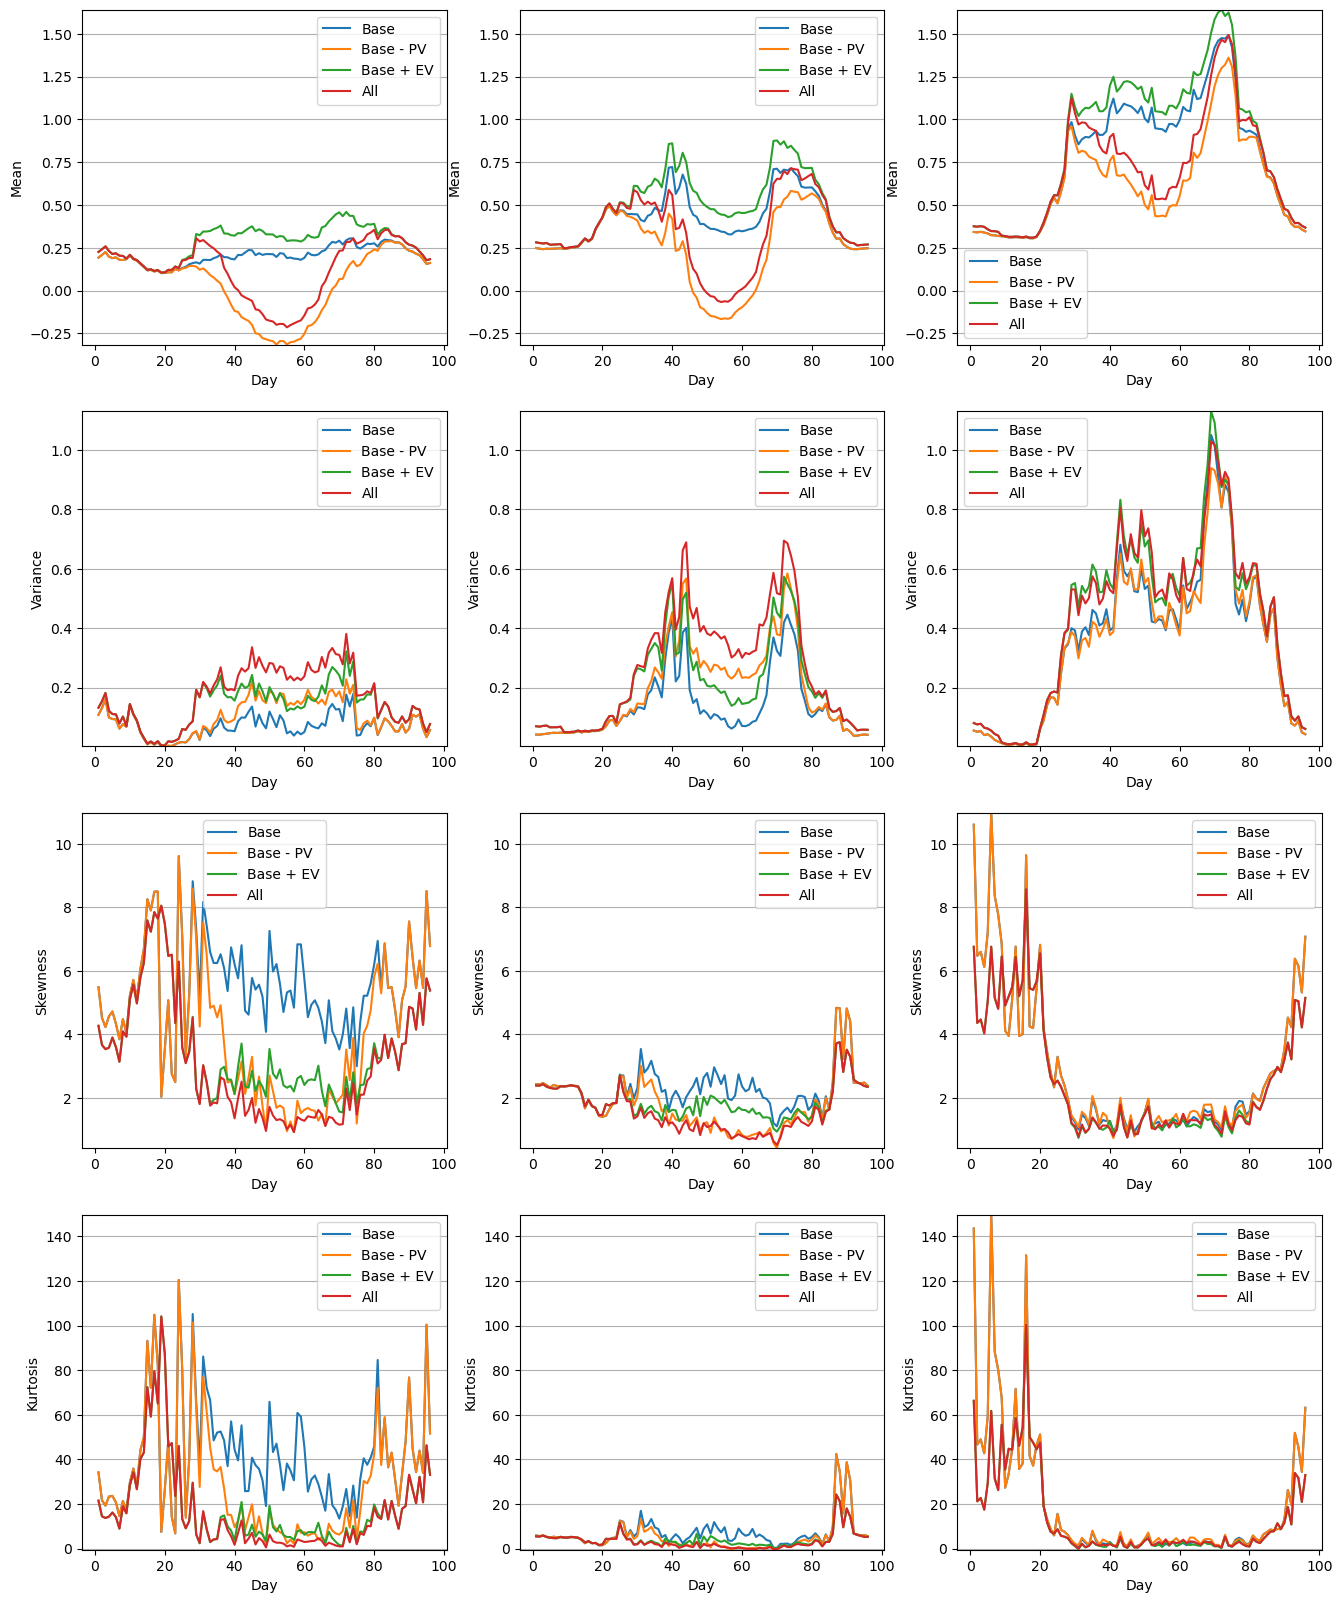

In [2142]:
first_difference = 0
second_difference = 0
chargingprofile = chargingprofile1

# consumer_profiles = [consumer1, consumer2, consumer3, consumer4]
consumer_profiles = [consumer1, consumer2, consumer3]

results_mean = {0: [], 1: [], 2: []}
results_var = {0: [], 1: [], 2: []}
results_skew = {0: [], 1: [], 2: []}
results_kurt = {0: [], 1: [], 2: []}

fig, axs = plt.subplots(4, 3, figsize=(16, 20))

all_means, all_vars, all_skews, all_kurts = [], [], [], []
for consumer_profile in consumer_profiles:
    net_consumption_ev = consumer_profile + chargingprofile
    net_consumption_pv = consumer_profile - solargen

    # Store values for global min/max computation
    all_means.extend([consumer_profile.mean(axis=1), net_consumption_pv.mean(axis=1), net_consumption_ev.mean(axis=1)])
    all_vars.extend([consumer_profile.var(axis=1), net_consumption_pv.var(axis=1), net_consumption_ev.var(axis=1)])
    all_skews.extend([consumer_profile.skew(axis=1), net_consumption_pv.skew(axis=1), net_consumption_ev.skew(axis=1)])
    all_kurts.extend([consumer_profile.kurt(axis=1), net_consumption_pv.kurt(axis=1), net_consumption_ev.kurt(axis=1)])

# Calculate global min and max for each statistic
mean_min, mean_max = min(map(lambda x: x.min(), all_means)), max(map(lambda x: x.max(), all_means))
var_min, var_max = min(map(lambda x: x.min(), all_vars)), max(map(lambda x: x.max(), all_vars))
skew_min, skew_max = min(map(lambda x: x.min(), all_skews)), max(map(lambda x: x.max(), all_skews))
kurt_min, kurt_max = min(map(lambda x: x.min(), all_kurts)), max(map(lambda x: x.max(), all_kurts))


for i, consumer_profile in enumerate(consumer_profiles):
    net_consumption_ev = consumer_profile + chargingprofile
    net_consumption_pv = consumer_profile - solargen
    net_consumption_all = consumer_profile + chargingprofile - solargen

    # First difference
    if first_difference == 1:
        #net_consumption = net_consumption.diff().iloc[1:]
        net_consumption = net_consumption.diff(axis=1).drop(net_consumption.columns[0], axis=1)

    if second_difference == 1:
        #net_consumption = net_consumption.diff().iloc[1:].diff().iloc[1:]
        net_consumption = net_consumption.diff(axis=1).diff(axis=1).drop(net_consumption.columns[0:2], axis=1)

    axs[0,i].plot(consumer_profile.mean(axis=1), label = 'Base')
    axs[0,i].plot(net_consumption_pv.mean(axis=1), label = 'Base - PV')
    axs[0,i].plot(net_consumption_ev.mean(axis=1), label = 'Base + EV')
    axs[0,i].plot(net_consumption_all.mean(axis=1), label = 'All')
    axs[0, i].set_ylim(mean_min, mean_max)
    axs[0,i].set_xlabel('Day')
    axs[0,i].set_ylabel('Mean')
    axs[0,i].legend()
    axs[0,i].grid(axis='y')

    axs[1,i].plot(consumer_profile.var(axis=1), label = 'Base')
    axs[1,i].plot(net_consumption_pv.var(axis=1), label = 'Base - PV')
    axs[1,i].plot(net_consumption_ev.var(axis=1), label = 'Base + EV')
    axs[1,i].plot(net_consumption_all.var(axis=1), label = 'All')
    axs[1, i].set_ylim(var_min, var_max)
    axs[1,i].set_xlabel('Day')
    axs[1,i].set_ylabel('Variance')
    axs[1,i].legend()
    axs[1,i].grid(axis='y')

    axs[2,i].plot(consumer_profile.skew(axis=1), label = 'Base')
    axs[2,i].plot(net_consumption_pv.skew(axis=1), label = 'Base - PV')
    axs[2,i].plot(net_consumption_ev.skew(axis=1), label = 'Base + EV')
    axs[2,i].plot(net_consumption_all.skew(axis=1), label = 'All')
    axs[2, i].set_ylim(skew_min, skew_max)
    axs[2,i].set_xlabel('Day')
    axs[2,i].set_ylabel('Skewness')
    axs[2,i].legend()
    axs[2,i].grid(axis='y')

    axs[3,i].plot(consumer_profile.kurt(axis=1), label = 'Base')
    axs[3,i].plot(net_consumption_pv.kurt(axis=1), label = 'Base - PV')
    axs[3,i].plot(net_consumption_ev.kurt(axis=1), label = 'Base + EV')
    axs[3,i].plot(net_consumption_all.kurt(axis=1), label = 'All')

    axs[3, i].set_ylim(kurt_min, kurt_max)

    axs[3,i].set_xlabel('Day')
    axs[3,i].set_ylabel('Kurtosis')
    axs[3,i].legend()
    axs[3,i].grid(axis='y')
